
# Собираю и анализирую свои прочитанные книги
---



In [336]:
import requests
import re
from tqdm import tqdm
import pandas as pd

## Получаю ключ API от Google Books и добавляю его сюда через Google диск

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [327]:
with open('/content/drive/MyDrive/Colab Notebooks/book_analyze/key.txt') as f:
  key = f.read()

## Создаю функцию для получения первого результата из поисковой выдачи по запросу в Google Boooks API

In [331]:
def find_volume(querry):

    url = 'https://www.googleapis.com/books/v1/volumes?q=' + querry + '&key=' + key

    response = requests.get(url)

    if response.json().get('totalItems') != 0:
      final = response.json().get('items')
      if final != None:
        final = final[0]
    else: final = {
        'id': None,
        'volumeInfo': {

            'title': None,
            'authors': None,
            'publisher': None,
            'publishedDate': None,
            'description': None,
            'pageCount': None,
            'imageLinks': None,
            'language': None,

          }
        }

    return final

## Создаю функцию для внесения json ответа в таблицу — вношу **id**, (проваливаюсь в items) **title, authors, publisher, publishedDate, description, pageCount, imageLinks, language**

In [318]:
def append_volume(found_volume):

  if found_volume != None:
    my_books_json['id'].append(found_volume.get('id'))

    if found_volume.get('volumeInfo') != None:
      my_books_json['title'].append(found_volume.get('volumeInfo').get('title'))
    else: my_books_json['title'].append(found_volume.get('volumeInfo'))

    if found_volume.get('volumeInfo') != None:
      my_books_json['authors'].append(found_volume.get('volumeInfo').get('authors'))
    else: my_books_json['authors'].append(found_volume.get('volumeInfo'))

    if found_volume.get('volumeInfo') != None:
      my_books_json['publisher'].append(found_volume.get('volumeInfo').get('publisher'))
    else: my_books_json['publisher'].append(found_volume.get('volumeInfo'))

    if found_volume.get('volumeInfo') != None:
      my_books_json['publishedDate'].append(found_volume.get('volumeInfo').get('publishedDate'))
    else: my_books_json['publishedDate'].append(found_volume.get('volumeInfo'))

    if found_volume.get('volumeInfo') != None:
      my_books_json['description'].append(found_volume.get('volumeInfo').get('description'))
    else: my_books_json['description'].append(found_volume.get('volumeInfo'))

    if found_volume.get('volumeInfo') != None:
      my_books_json['pageCount'].append(found_volume.get('volumeInfo').get('pageCount'))
    else: my_books_json['pageCount'].append(found_volume.get('volumeInfo'))

    if found_volume.get('volumeInfo') != None:
      my_books_json['imageLinks'].append(found_volume.get('volumeInfo').get('imageLinks'))
    else: my_books_json['imageLinks'].append(found_volume.get('volumeInfo'))

    if found_volume.get('volumeInfo') != None:
      my_books_json['language'].append(found_volume.get('volumeInfo').get('language'))
    else: my_books_json['language'].append(found_volume.get('volumeInfo').get('language'))
  else:

    my_books_json['id'].append(None)
    my_books_json['title'].append(None)
    my_books_json['authors'].append(None)
    my_books_json['publisher'].append(None)
    my_books_json['publishedDate'].append(None)
    my_books_json['description'].append(None)
    my_books_json['pageCount'].append(None)
    my_books_json['imageLinks'].append(None)
    my_books_json['language'].append(None)

  return 0


## Достаю из файла и чищу названия своих любимых книг

In [225]:
with open('/content/drive/MyDrive/Colab Notebooks/book_analyze/books.txt') as f:
  books = f.read()

In [226]:
books = re.sub('\d,\d\n*.*\n*.*\)', ' ', books)

In [227]:
books = books.split('\n \n')

In [228]:
books_clean = []
for item in books:
  books_clean.append(item.replace('\n', ' '))

## Создаю **json** своих любимых кинг для перевода в **Pandas DataFrame**

In [332]:
my_books_json = {
    'id':  [],
    'title': [],
    'authors': [],
    'publisher': [],
    'publishedDate': [],
    'description': [],
    'pageCount': [],
    'imageLinks': [],
    'language': []
}

## Соединяю детали функции для поиска и внесения с очищенными запросами

In [333]:
for book in tqdm(books_clean):
  found_volume = find_volume(book)
  append_volume(found_volume)

100%|██████████| 86/86 [00:33<00:00,  2.54it/s]


In [337]:
df = pd.DataFrame(my_books_json)

In [338]:
df.head()

,id,title,authors,publisher,publishedDate,description,pageCount,imageLinks,language
0,4wooDwAAQBAJ,Как устроиться на работу своей мечты: от собес...,[Якуба Владимир Александрович],"""Издательский дом """"Питер""""""",2017-05-04,"Вы знаете, сколько времени уходит на просмотр ...",160.0,{'smallThumbnail': 'http://books.google.com/bo...,ru
1,Lsk-dirqTM8C,Как чашка за чашкой строилась Starbucks,"[Дори Джонс Йенг, Говард Шульц]",Альпина Паблишер,2012,Говард Шульц стал генеральным директором Starb...,288.0,{'smallThumbnail': 'http://books.google.com/bo...,ru
2,yi0_DwAAQBAJ,О стойкости мудреца,"[Марк Аврелий, Эпиктет, Сенека]",Рипол Классик,2017-09-15,Стоицизм - поистине уникальная философская шко...,NaN,{'smallThumbnail': 'http://books.google.com/bo...,ru
3,dqB5DwAAQBAJ,Сила воли. Возьми свою жизнь под контроль,"[Джон Тирни, Рой Баумайстер]",Litres,2018-11-13,Хочешь быть счастливым – тренируй силу воли. И...,343.0,{'smallThumbnail': 'http://books.google.com/bo...,ru
4,Qe4WEAAAQBAJ,Никаких правил,"[Рид Хастингс, Эрин Мейер]","""Манн, Иванов и Фербер""",None,"Книга о корпоративной культуре Netflix, котора...",386.0,{'smallThumbnail': 'http://books.google.com/bo...,ru


## На каом языке я больше читаю?

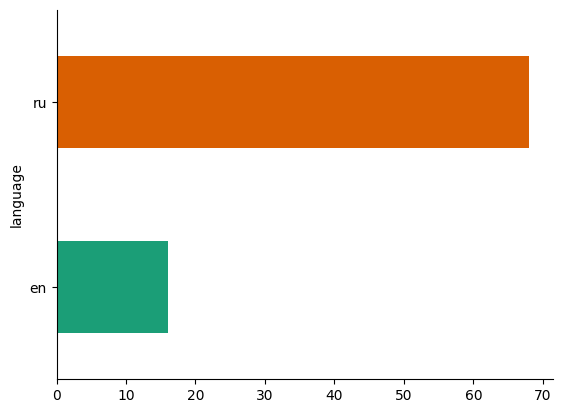

In [341]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('language').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Сколько страниц в прочитанных мной книгах?

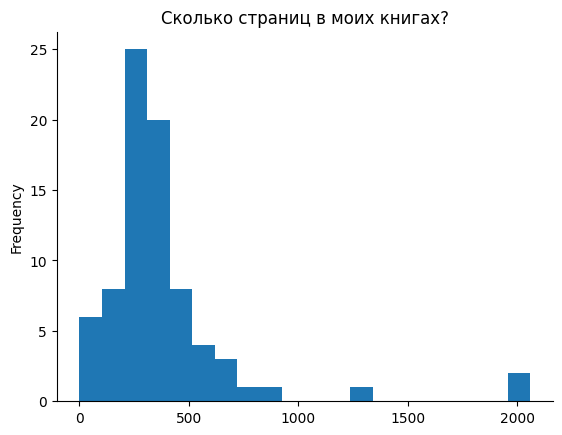

In [344]:
from matplotlib import pyplot as plt
df['pageCount'].plot(kind='hist', bins=20, title='Сколько страниц в моих книгах?')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Сохраню датафрейм на диске, чтобы не транжирить запросы к API

In [343]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/book_analyze/my_books.csv')